## ann
> - 뉴런마다 입력 개수만큼의 가중치 -> 모든 입력에 가중치를 곱한다.
> - 경사 하강법 알고리즘을 통해 손실이 낮아지도록 최적의 가중치와 절편을 찾는다.

# 합성곱
> - 유용한 특성만 드러나게 하는 것 -> 일부에 가중치를 곱한다.
> - 첫 번째 합성곱에서 사용된 가중치는 동일하게 사용된다. => 가중치 개수 = 하이퍼파라미터
> - 한 칸씩 아래로 이동하면서 출력을 만드는 것
> - 합성곱 신경망 => 뉴런 -> 필터 / 커널

### 뉴런 개수 = 필터 (도장)
### 가중치 = 커널

> -  합성곱 계산을 통해 얻은 출력 = 특성맵
> -  주위를 가상의 원소로 채우는 것 = 패딩
> -  실제 입력값이 아니기 때문에 패딩은 0으로 채운다. -> 도장의 횟수를 늘려주는 것밖에 없다 = 계산에 영향을 미치지 않는다.

> - 입력과 특성 맵의 크기를 동일하게 만들기 위해 입력 주위에 0으로 패딩하는 것 = 세임(same) 패딩 ex) (4,4) -> (3,3) => (4,4) => 많이 사용
> - 패딩 없이 순수한 입력 배열에서만 합성곱을 해 특성 맵을 만드는 경우 = 밸리드(valid) 패딩 => 특성 맵의 크기가 줄어든다.

> - 세임 패딩 많이 사용 => 모서리에 있는 중요한 정보가 특성 맵으로 잘 전달되기 하기 위해 사용
> - 적달한 패딩은 이미지 주변에 있는 정보를 잃어버리지 않도록 도와준다.

### 커널 배열의 깊이 = 입력의 깊이

### 입력이나 필터의 차원이 몇 개인지 상관없이 항상 출력은 하나의 값

### 케라스의 합성곱 층은 항상 3차원 입력을 기대한다.

### 너비와 높이는 점점 줄어들고 깊이는 점점 깊어지는 것이 특징이다.

In [1]:
from tensorflow import keras

keras.layers.Conv2D(10, kernel_size=(3,3), activation='relu', padding='same', strides=1)
# (필터의 개수(도장), 필터에 사용할 커널의 크기(가중치), 활성화 함수, padding, 이동 크기)
# 특성 맵은 활성화 함수를 통과한 값 / 커널의 크기 (3, 3), (5, 5)를 권장

<Conv2D name=conv2d, built=False>

## 풀링
> - 합성곱 층에서 만든 특성 맵의 가로세로 크기를 줄이는 역할 수행
> - 특성 맵의 개수는 줄이지 않는다. -> (2, 2, 3) => (1, 1, 3)
> - 가중치가 없다.
> - 가장 큰 값을 고르거나 평균값을 계산한다 -> 최대 풀링, 평균 풀링
> - = 풀링층
> - 합성곱 측과 풀링 층에서 출력되는 값을 모두 특성 맵이라고 한다.

> - 겹치지 않고 이동한다. (n, n) = strides=n
> - 패딩을 하지 않는다.

In [ ]:
keras.layers.MaxPooling2D(2, strides=2, padding='valid') # 최대값 -> 자주 사용
keras.layers.AveragePooling2D(2, strides=2, padding='valid') # 평균 -> 중요한 정보를 평균해 희석할 수 있다.

In [12]:
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, random_state=42)
# 4800, 28, 28, 1


model = keras.Sequential()


# 첫 번째
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28, 28, 1)))
# same padding -> 특성맵의 크기 = 입력 값 -> 28, 28, 32

model.add(keras.layers.MaxPooling2D(2))
# 14, 14, 32


# 두 번째
model.add(keras.layers.Conv2D(64, kernel_size=3, activation='relu', padding='same'))
# same padding -> 특성맵의 크기 = 입력 값

model.add(keras.layers.MaxPooling2D(2))
# 7, 7, 64


# 일렬로 펼치기
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))

In [14]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │       313,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 333,526 (1.27 MB)

 Trainable params: 333,526 (1.27 MB)

 Non-trainable params: 0 (0.00 B)

In [29]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.keras', save_best_only=True)

early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)

history = model.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.7414 - loss: 0.7241 - val_accuracy: 0.8775 - val_loss: 0.3286
Epoch 2/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.8682 - loss: 0.3615 - val_accuracy: 0.8979 - val_loss: 0.2752
Epoch 3/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.8894 - loss: 0.3055 - val_accuracy: 0.9063 - val_loss: 0.2583
Epoch 4/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.9029 - loss: 0.2652 - val_accuracy: 0.9119 - val_loss: 0.2343
Epoch 5/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.9135 - loss: 0.2434 - val_accuracy: 0.9144 - val_loss: 0.2319
Epoch 6/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.9192 - loss: 0.2214 - val_accuracy: 0.9163 - val_loss: 0.2275
Epoch 7/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.9252 - loss: 0.2023 - val_accuracy: 0.9165 - val_loss: 0.2274
Epoch 8/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.9292 - los

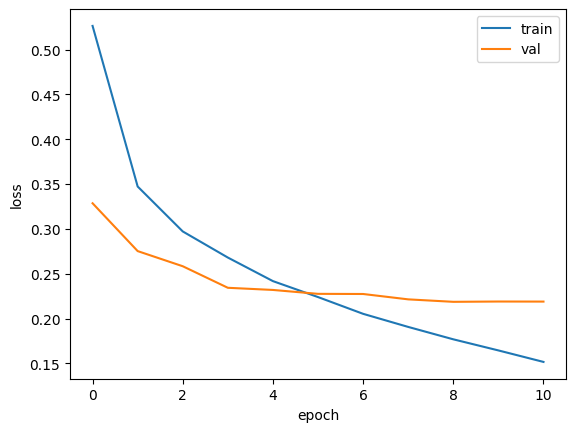

In [30]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [31]:
model.evaluate(val_scaled, val_target)

469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9224 - loss: 0.2179


[0.21864818036556244, 0.9225333333015442]

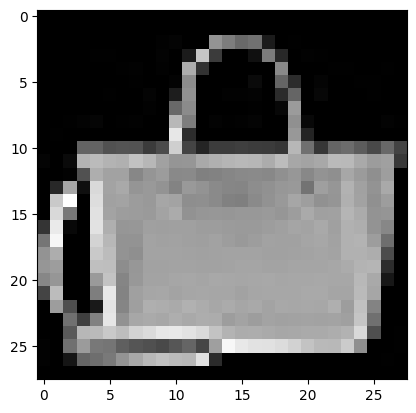

In [35]:
plt.imshow(val_scaled[0].reshape(28, 28), cmap='gray')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
[[5.3469818e-16 1.1278266e-23 1.8221766e-17 1.5618185e-14 2.8499523e-15
  6.1027599e-14 2.0240567e-17 1.6897658e-14 1.0000000e+00 9.4393874e-17]]


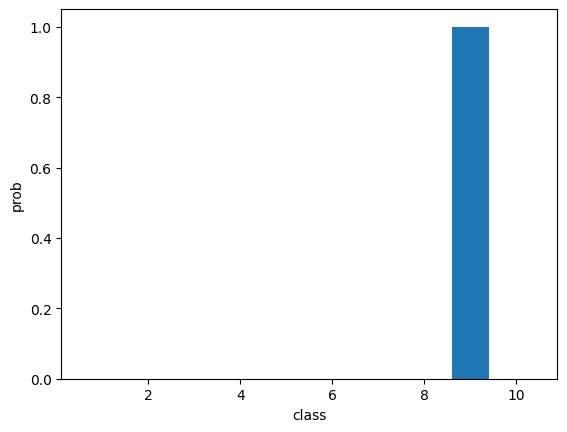

In [39]:
preds = model.predict(val_scaled[0:1])
print(preds) # 9번째

plt.bar(range(1, 11), preds[0])
plt.xlabel('class')
plt.ylabel('prob')
plt.show()

In [41]:
classes = ['티셔츠', '가방', '스웨터', '드레스', '코트', '샌달', '셔츠', '스니커즈', '가방', '앵클 부츠']

print(classes[np.argmax(preds)])

가방


In [43]:
test_scaled = test_input.reshape(-1, 28, 28, 1) / 255.0

model.evaluate(test_scaled, test_target)
# loss = 모델의 예측값과 실제값 사이의 차이를 나타내는 지표, 손실 값이 낮을 수록 모델의 성능이 좋다.
# Accuracy

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9144 - loss: 0.2622


[0.24768845736980438, 0.9156000018119812]